In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import accuracy_score,confusion_matrix

In [2]:
df = pd.read_csv("train.csv")
df_test = pd.read_csv("test.csv")

In [3]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [4]:
df.shape

(2000, 21)

In [5]:
df.dtypes

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [7]:
df.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
df.nunique()

battery_power    1094
blue                2
clock_speed        26
dual_sim            2
fc                 20
four_g              2
int_memory         63
m_dep              10
mobile_wt         121
n_cores             8
pc                 21
px_height        1137
px_width         1109
ram              1562
sc_h               15
sc_w               19
talk_time          19
three_g             2
touch_screen        2
wifi                2
price_range         4
dtype: int64

# Checking for null values

In [9]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

# Checking the variance

In [10]:
df.var()

battery_power    1.930884e+05
blue             2.501001e-01
clock_speed      6.658629e-01
dual_sim         2.500348e-01
fc               1.884813e+01
four_g           2.496626e-01
int_memory       3.292670e+02
m_dep            8.318353e-02
mobile_wt        1.253136e+03
n_cores          5.234197e+00
pc               3.677592e+01
px_height        1.969414e+05
px_width         1.867964e+05
ram              1.176644e+06
sc_h             1.775143e+01
sc_w             1.897820e+01
talk_time        2.985481e+01
three_g          1.817086e-01
touch_screen     2.501161e-01
wifi             2.500760e-01
price_range      1.250625e+00
dtype: float64

In [11]:
df['price_range'].unique()

array([1, 2, 3, 0], dtype=int64)

# Exploratory Data Analysis

<AxesSubplot:xlabel='price_range', ylabel='ram'>

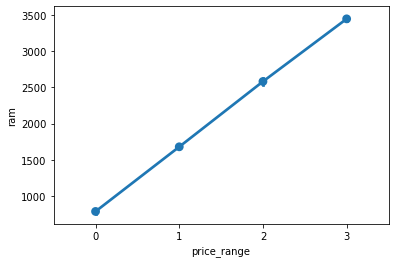

In [12]:
sns.pointplot(y='ram',x='price_range',data=df)

<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

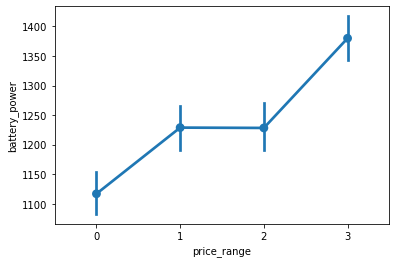

In [13]:
#Relationship between battery and price
sns.pointplot(x='price_range',y='battery_power',data=df)



<AxesSubplot:xlabel='price_range', ylabel='battery_power'>

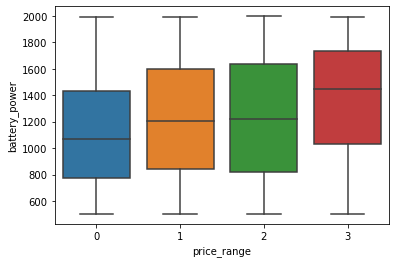

In [14]:
sns.boxplot(x='price_range',y='battery_power',data=df)

<AxesSubplot:xlabel='price_range', ylabel='int_memory'>

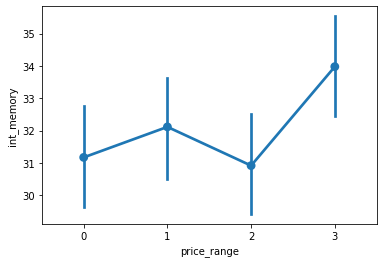

In [15]:
#Relationship between memory and price
sns.pointplot(x='price_range',y='int_memory',data=df)

In [16]:
col = df.columns
col

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [17]:
categorical_col = ['blue','dual_sim','four_g','three_g','touch_screen','price_range']

C:\Users\harap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


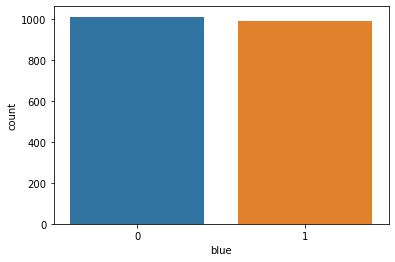

C:\Users\harap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


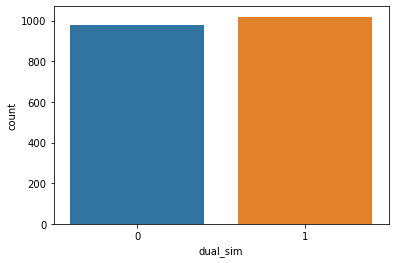

C:\Users\harap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


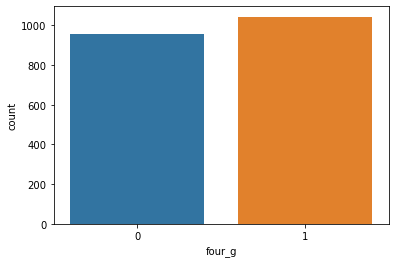

C:\Users\harap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


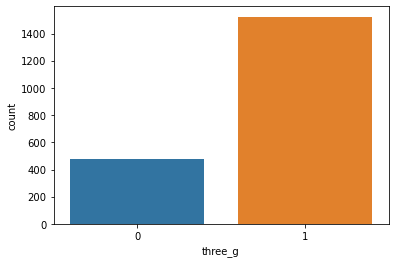

C:\Users\harap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


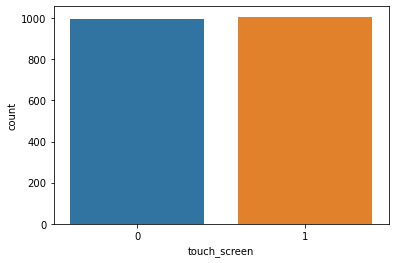

C:\Users\harap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


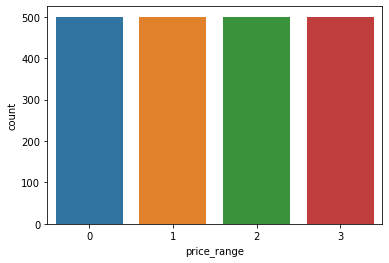

In [18]:
for i in categorical_col:
  sns.countplot(df[i])
  plt.xlabel(i)
  plt.show()

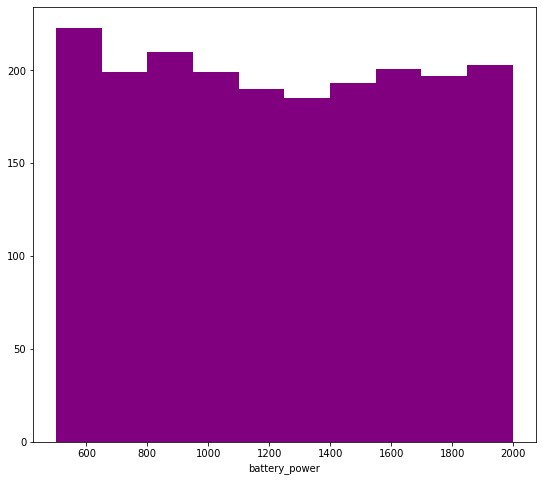

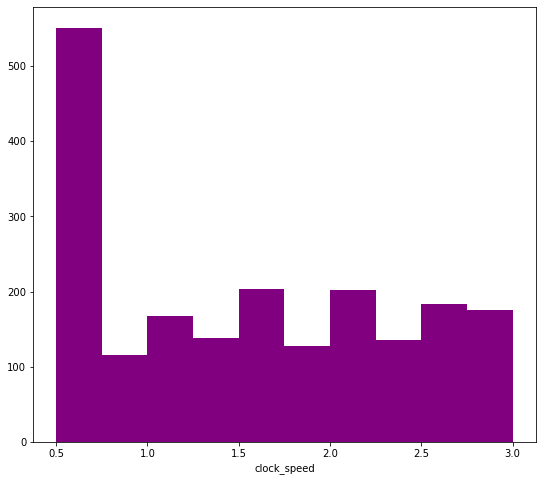

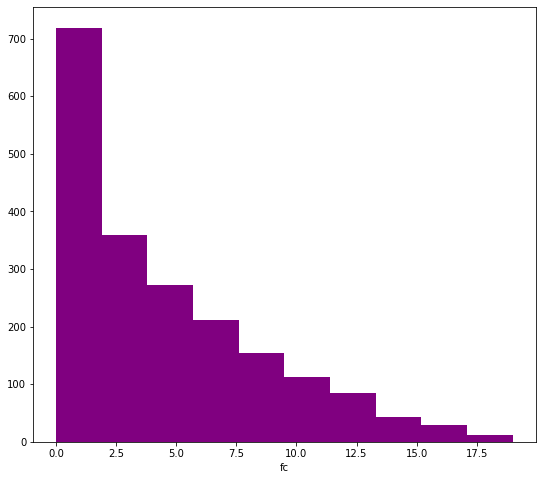

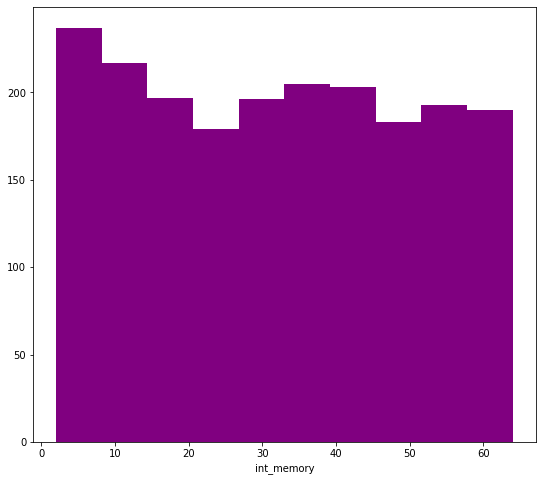

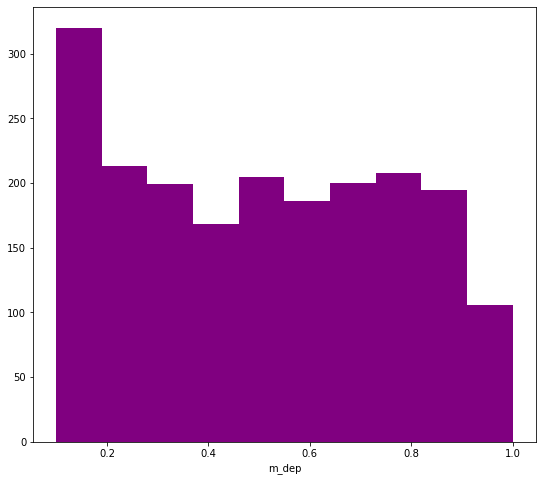

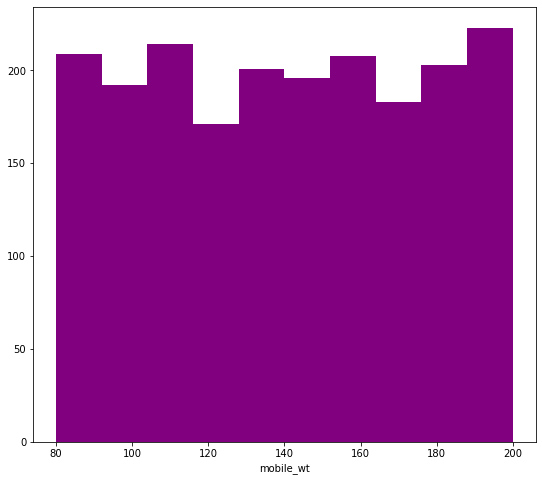

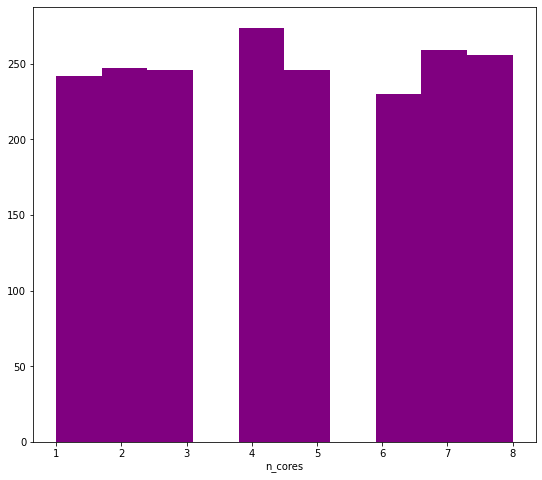

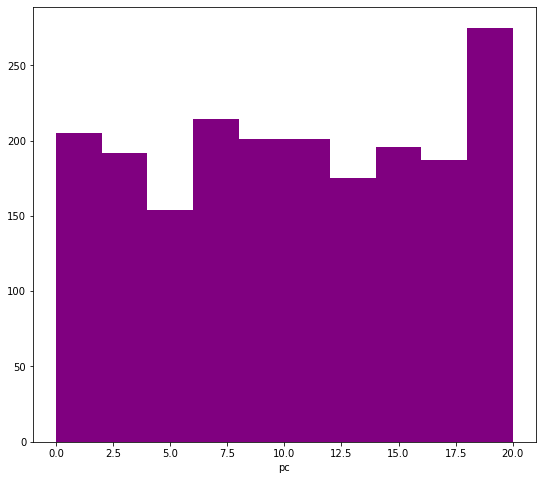

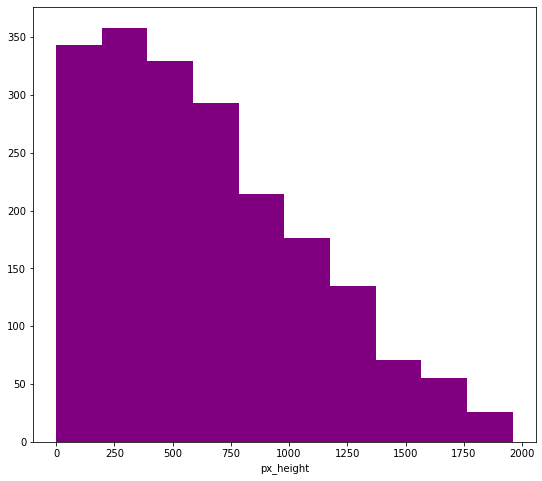

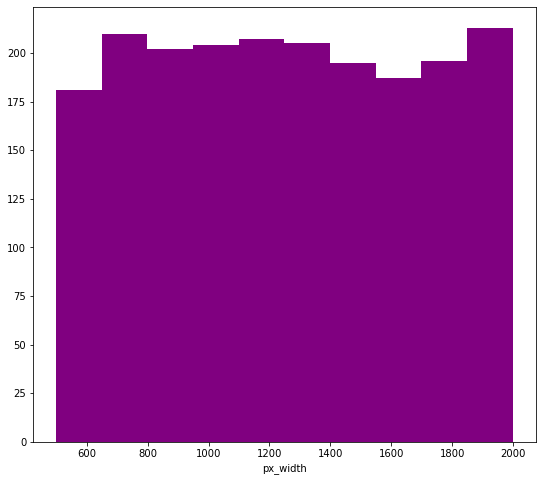

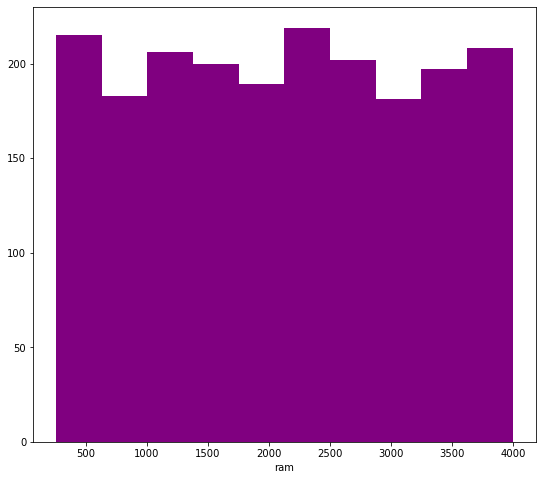

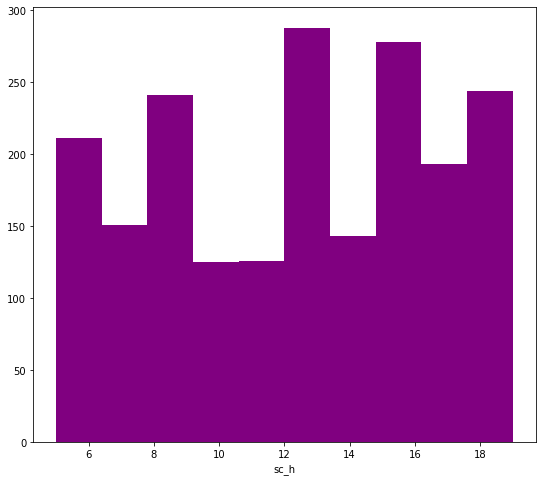

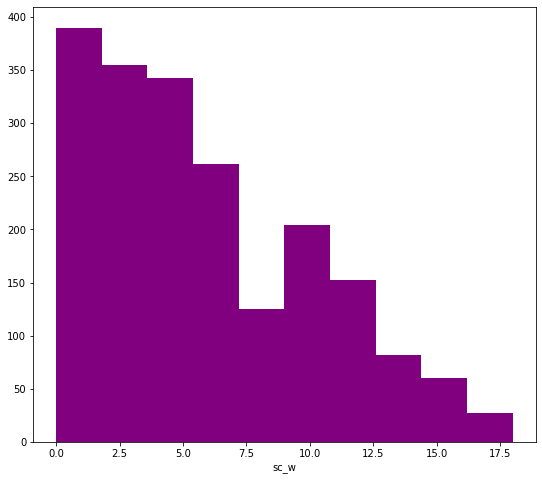

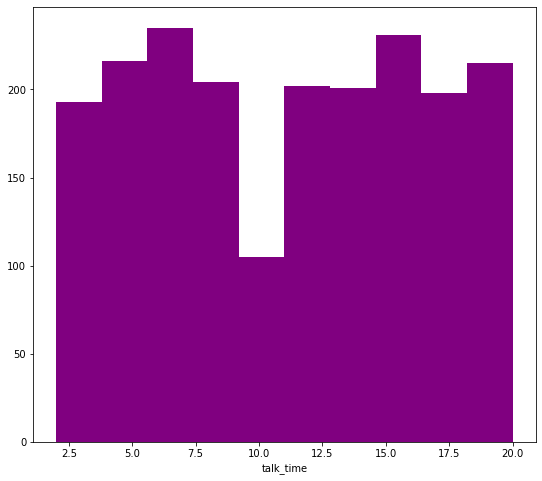

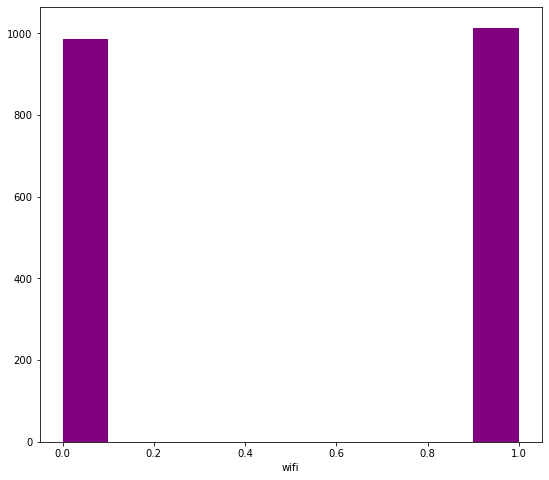

In [19]:
for i in df.drop(df[categorical_col],axis=1):
        fig = plt.figure(figsize=(9,8))
        plt.hist(df[i],color='purple',bins=10)
        plt.xlabel(i)
        plt.show()

In [20]:
#Checking the correlation by plotting correlation plot.

Text(0.5, 1.0, 'Correlation ')

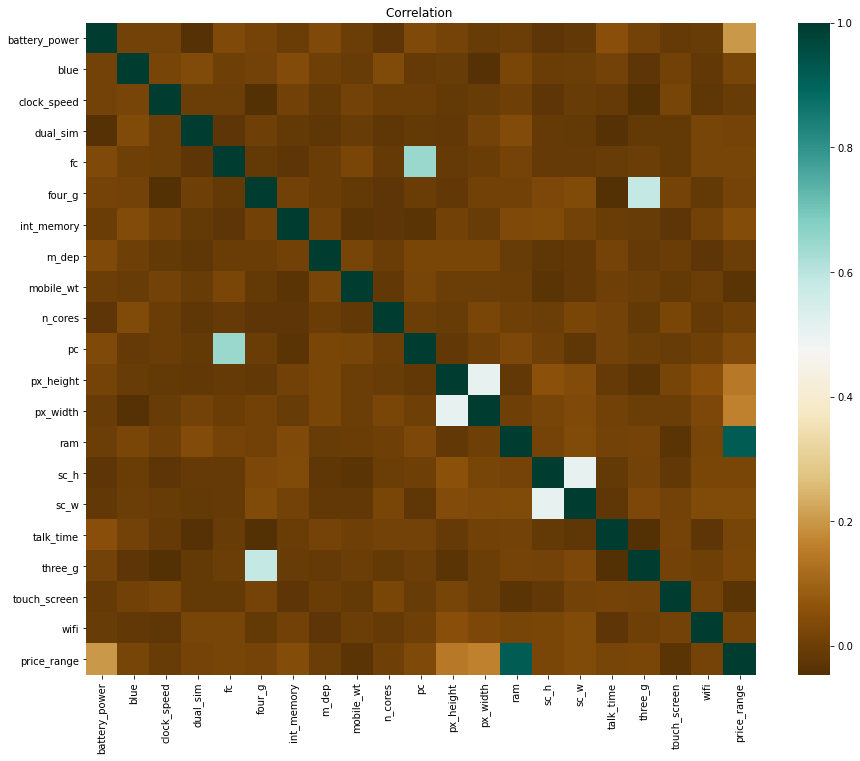

In [21]:
corr=df.corr()
fig = plt.figure(figsize=(15,12))
r = sns.heatmap(corr, cmap='BrBG')
r.set_title("Correlation ")

<AxesSubplot:xlabel='touch_screen', ylabel='ram'>

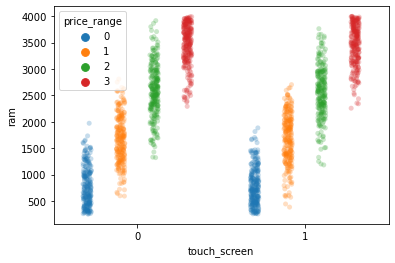

In [22]:
# Show each observation with a scatterplot
sns.stripplot(x="touch_screen", y="ram", hue="price_range",
              data=df, dodge=True, jitter=True,
              alpha=.25, zorder=1)

# Show the conditional means

C:\Users\harap\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harap\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\harap\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

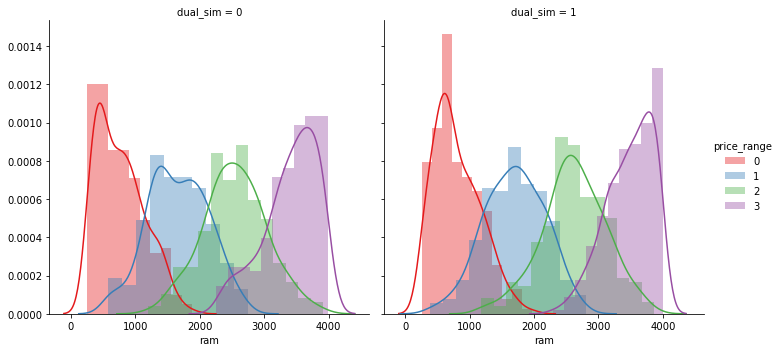

In [23]:
g = sns.FacetGrid(df, col="dual_sim", hue="price_range", palette="Set1",height=5)
g = (g.map(sns.distplot, "ram").add_legend())

In [24]:
x=df.drop('price_range',axis=1)
y=df['price_range']

In [25]:
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


In [26]:
scale=StandardScaler()
scaled=scale.fit_transform(x)

#3G supported phones

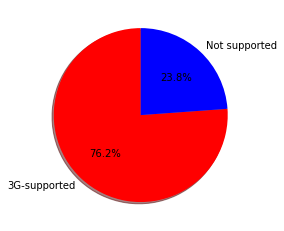

In [27]:
labels = ["3G-supported",'Not supported']
values = df['three_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['red', 'blue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

#4G supported phones

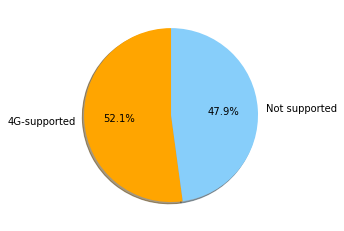

In [28]:
labels = ["4G-supported",'Not supported']
values = df['four_g'].value_counts().values
fig1, ax1 = plt.subplots()
colors = ['orange', 'lightskyblue']
ax1.pie(values, labels=labels, autopct='%1.1f%%',shadow=True,startangle=90,colors=colors)
plt.show()

Text(0.5, 0, 'MegaPixels')

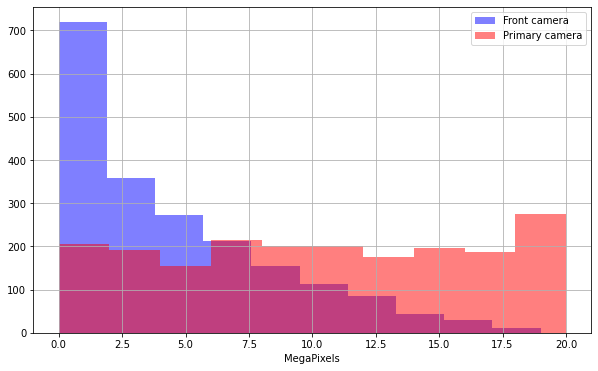

In [29]:
plt.figure(figsize=(10,6))
df['fc'].hist(alpha=0.5,color='blue',label='Front camera')
df['pc'].hist(alpha=0.5,color='red',label='Primary camera')
plt.legend()
plt.xlabel('MegaPixels')

# Models

In [30]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=123,stratify=y)


# 1) Logistick Regression

In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
lr=LogisticRegression()
lr.fit(x_train,y_train)

C:\Users\harap\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [39]:
y_test_pred = lr.predict(x_test)
y_train_pred = lr.predict(x_train)
lr_acc=accuracy_score(y_test_pred,y_test)

In [40]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:64.26666666666667
Test Set Accuracy:63.4

Confusion Matrix:
[[97 25  0  0]
 [27 65 35  1]
 [ 1 30 57 26]
 [ 0  5 33 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       122
           1       0.52      0.51      0.51       128
           2       0.46      0.50      0.48       114
           3       0.78      0.72      0.75       136

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.64      0.63      0.64       500



# 2) KNN

In [41]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier()

In [42]:
y_test_pred1 = knn.predict(x_test)
y_train_pred1=knn.predict(x_train)
knn_acc=accuracy_score(y_test_pred1,y_test)

In [43]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:64.26666666666667
Test Set Accuracy:63.4

Confusion Matrix:
[[97 25  0  0]
 [27 65 35  1]
 [ 1 30 57 26]
 [ 0  5 33 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       122
           1       0.52      0.51      0.51       128
           2       0.46      0.50      0.48       114
           3       0.78      0.72      0.75       136

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.64      0.63      0.64       500



# 3)SVM

In [44]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train, y_train)

SVC()

In [45]:
y_test_pred2 = svc.predict(x_test)
y_train_pred2=svc.predict(x_train)
svc_acc=accuracy_score(y_test_pred2,y_test)

In [46]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred,y_test))

Train Set Accuracy:64.26666666666667
Test Set Accuracy:63.4

Confusion Matrix:
[[97 25  0  0]
 [27 65 35  1]
 [ 1 30 57 26]
 [ 0  5 33 98]]

Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.80      0.79       122
           1       0.52      0.51      0.51       128
           2       0.46      0.50      0.48       114
           3       0.78      0.72      0.75       136

    accuracy                           0.63       500
   macro avg       0.63      0.63      0.63       500
weighted avg       0.64      0.63      0.64       500



# 4) DesisionTree

In [47]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)

DecisionTreeClassifier()

In [48]:
y_test_pred3 = dt.predict(x_test)
y_train_pred3=dt.predict(x_train)

In [49]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred3,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred3,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred3,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred3,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:81.6

Confusion Matrix:
[[111  13   0   0]
 [ 13  96  19   0]
 [  1  16  92  16]
 [  0   0  14 109]]

Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.90      0.89       124
           1       0.77      0.75      0.76       128
           2       0.74      0.74      0.74       125
           3       0.87      0.89      0.88       123

    accuracy                           0.82       500
   macro avg       0.82      0.82      0.82       500
weighted avg       0.82      0.82      0.82       500



# hyper parameter tuning


In [50]:
grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)}

In [51]:
grid_search = GridSearchCV(dt, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 2320 tasks      | elapsed:   21.8s
[Parallel(n_jobs=-1)]: Done 2560 out of 2560 | elapsed:   23.7s finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [52]:
grid_search.best_params_

{'criterion': 'gini',
 'max_depth': 7,
 'min_samples_leaf': 7,
 'min_samples_split': 4}

In [53]:
dt = grid_search.best_estimator_

In [54]:
y_predi=dt.predict(x_test)

In [55]:
dt_train_acc = accuracy_score(y_train, dt.predict(x_train))
dt_test_acc = accuracy_score(y_test, y_predi)

In [56]:
print(f"Training Accuracy of SVC Model is {dt_train_acc}")
print(f"Test Accuracy of SVC Model is {dt_test_acc}")

Training Accuracy of SVC Model is 0.9253333333333333
Test Accuracy of SVC Model is 0.836


# 5) RanndomForest

In [57]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train,y_train)

RandomForestClassifier()

In [58]:
y_test_pred4 = rf.predict(x_test)
y_train_pred4=rf.predict(x_train)
rf_acc=accuracy_score(y_test_pred4,y_test)

In [59]:
print("Train Set Accuracy:"+str(accuracy_score(y_train_pred4,y_train)*100))
print("Test Set Accuracy:"+str(accuracy_score(y_test_pred4,y_test)*100))
print("\nConfusion Matrix:\n%s"%confusion_matrix(y_test_pred4,y_test))
print("\nClassification Report:\n%s"%classification_report(y_test_pred4,y_test))

Train Set Accuracy:100.0
Test Set Accuracy:85.8

Confusion Matrix:
[[121  16   0   0]
 [  4  97  23   0]
 [  0  12  98  12]
 [  0   0   4 113]]

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.88      0.92       137
           1       0.78      0.78      0.78       124
           2       0.78      0.80      0.79       122
           3       0.90      0.97      0.93       117

    accuracy                           0.86       500
   macro avg       0.86      0.86      0.86       500
weighted avg       0.86      0.86      0.86       500



In [60]:
models = pd.DataFrame({
    'Model': ['Logistic Regression', 'KNN', 'SVC',  'Decision Tree Classifier','RandomForest Classifier',],
    'Score': [lr_acc, knn_acc, svc_acc, dt_test_acc, rf_acc]
})

models.sort_values(by = 'Score', ascending = False)

,Model,Score
2,SVC,0.940
1,KNN,0.904
4,RandomForest Classifier,0.858
3,Decision Tree Classifier,0.836
0,Logistic Regression,0.634


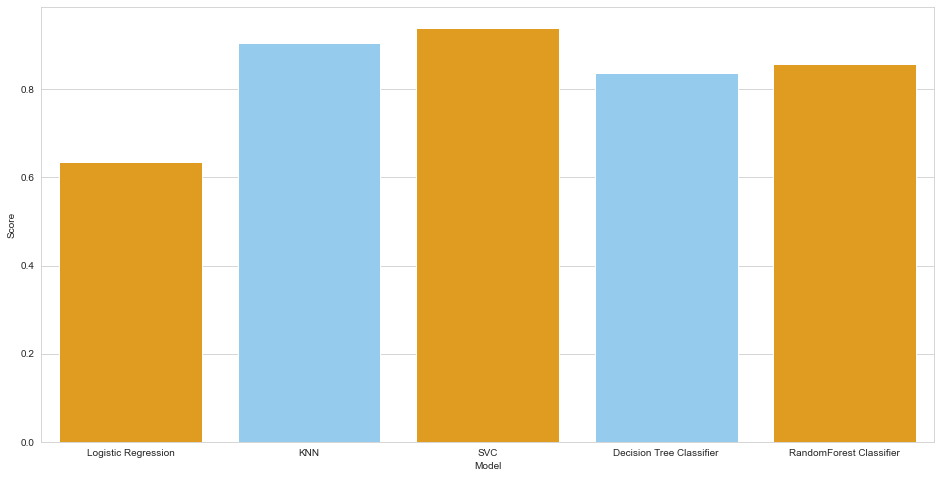

In [61]:
sns.set_style("whitegrid")
plt.figure(figsize=(16,8))
plt.ylabel("Accuracy %")
plt.xlabel("Algorithms")
sns.barplot(x=models['Model'],y=models['Score'], palette=colors )
plt.show()